# Milestone 1

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv("data\\financial_loan.csv")

In [4]:
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [41]:
data.columns

Index(['address_state', 'emp_length', 'emp_title', 'grade', 'home_ownership',
       'issue_date', 'last_credit_pull_date', 'last_payment_date',
       'loan_status', 'next_payment_date', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount', 'total_acc', 'total_payment'],
      dtype='object')

## Opis kolumn
- id - identyfikator klienta/wniosku
- address_state - stan zamieszkania
- application_type - typ aplikacji **(zawiera tylko wartość INDIVIDUAL)**
- emp_length - długość zatrudnienia w latach
- emp_title - stanowisko prcay
- grade - ocena kredytowa **(A-G im wyższa tym lepiej)**
- home_ownership - status posiadania domu **(RENT, MORTAGE, OWN, OTHER, NONE)**
- issue_date - data wydania pożyczki
- last_credit_pull_date - data ostatniego sprawdzenia historii kredytowej
- last_payment_date - data ostatniej wpłaty na pożyczkę
- loan_status - status pożyczki **(Fully_Paid, Charged Off, Current)**
- next_payment_date - planowana data następnej wpłaty
- member_id - identyfikator klienta
- purpose - cel pożyczki **(13 kategorii plus other)**
- sub_grade - podkategoria oceny kredytowej **(bardziej dokładna niż grade, typu A1, A2, ...)**
- term - okres spłaty pożyczki **(36 months, 60 months)**
- verification_status - status weryfikacji dochodu klienta **(Not Verified, Verified, Source Verified)**
- annual_income - roczny dochód klienta
- dti (dent-to-income-ratio) - wskaźnik zadłużenia do dochodu
- installment - miesięczna rata
- int_rate - oprocentowanie
- loan_amount - kwota pożyczki
- total_acc - łączna liczba kont kredytowych klienta'
- total_payment - łączna suma spłat dokonanych przez klienta

## Cel biznesowy 
- Możliwość dostosowania produktów kredytowych do konkretnych grup klientów. (dłuższy termin spłaty itp.)
- Wykrywanie wzorców niespłacania i poprawa procesów windykacyjnych przez zrozumienie charakterystyk klastrów o wysokim ryzyku.
- Zrozumienie czynników wpływających na spłacalność (zmienne różnicujące klastry).

## Analiza 

In [ ]:
data.info() #none pojawia się w kolumnie emp_title

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [51]:
data.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [54]:
data.nunique()

id                       38576
address_state               50
application_type             1
emp_length                  11
emp_title                28525
grade                        7
home_ownership               5
issue_date                  65
last_credit_pull_date      107
last_payment_date          102
loan_status                  3
next_payment_date          102
member_id                38576
purpose                     14
sub_grade                   35
term                         2
verification_status          3
annual_income             5096
dti                       2863
installment              15132
int_rate                   371
loan_amount                880
total_acc                   82
total_payment            19525
dtype: int64

In [49]:
columns = ['application_type', 'emp_length',
       'grade', 'home_ownership', 'loan_status',
       'purpose', 'sub_grade', 'term', 'verification_status']
for col in columns:
    print(f"Unique values in {col}:")
    print(data[col].value_counts())
    print("\n")

Unique values in application_type:
application_type
INDIVIDUAL    38576
Name: count, dtype: int64


Unique values in emp_length:
emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64


Unique values in grade:
grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64


Unique values in home_ownership:
home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64


Unique values in loan_status:
loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64


Unique values in purpose:
purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         177

Czy loan_status można zamienić z 3 na 2 kategorie?
```
Unique values in loan_status:
loan_status
Fully Paid     32145
Charged Off     5333
Current         1098 
```

In [30]:
mask = data['emp_title'].map(data['emp_title'].value_counts()) > 34
data.loc[mask, 'emp_title'].value_counts()

emp_title
US Army                    135
Bank of America            109
IBM                         67
AT&T                        63
Wells Fargo                 57
Kaiser Permanente           56
USAF                        55
UPS                         52
US Air Force                52
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   42
Verizon Wireless            41
Self Employed               40
USPS                        40
US ARMY                     39
Walgreens                   38
JP Morgan Chase             38
US Navy                     37
Department of Defense       36
JPMorgan Chase              36
Target                      35
Self                        35
Name: count, dtype: int64

In [ ]:
sum(data['emp_title'].value_counts()==1) #tyle nazw stanowisk pojawia się tylko raz

25309

In [ ]:
np.divide(data['emp_title'].isnull().sum(), data['emp_title'].count()) #braki danych prawie 4%


np.float64(0.038720448058592274)

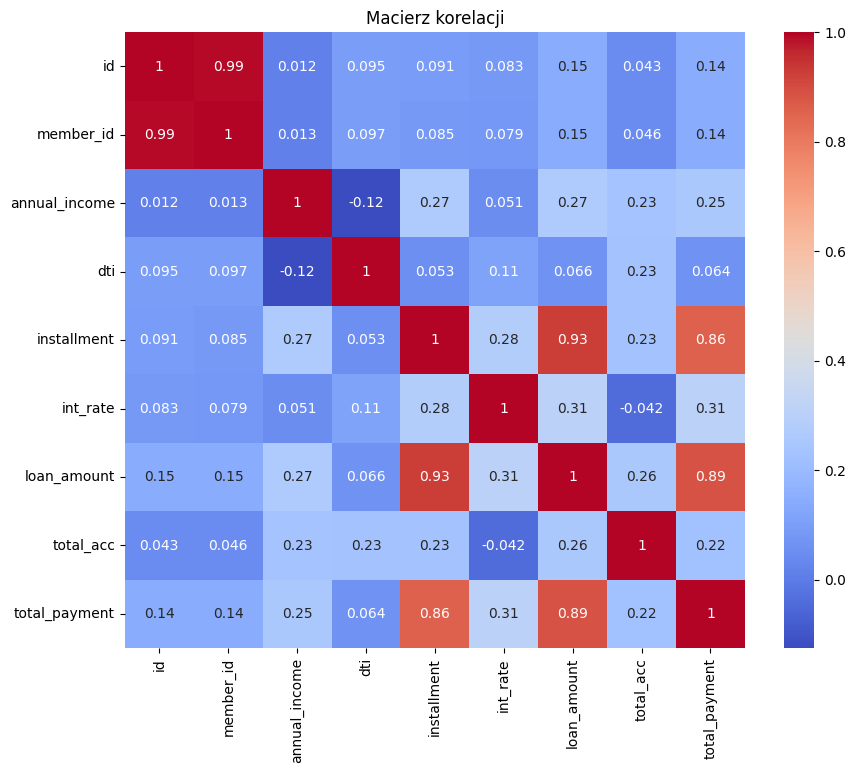

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


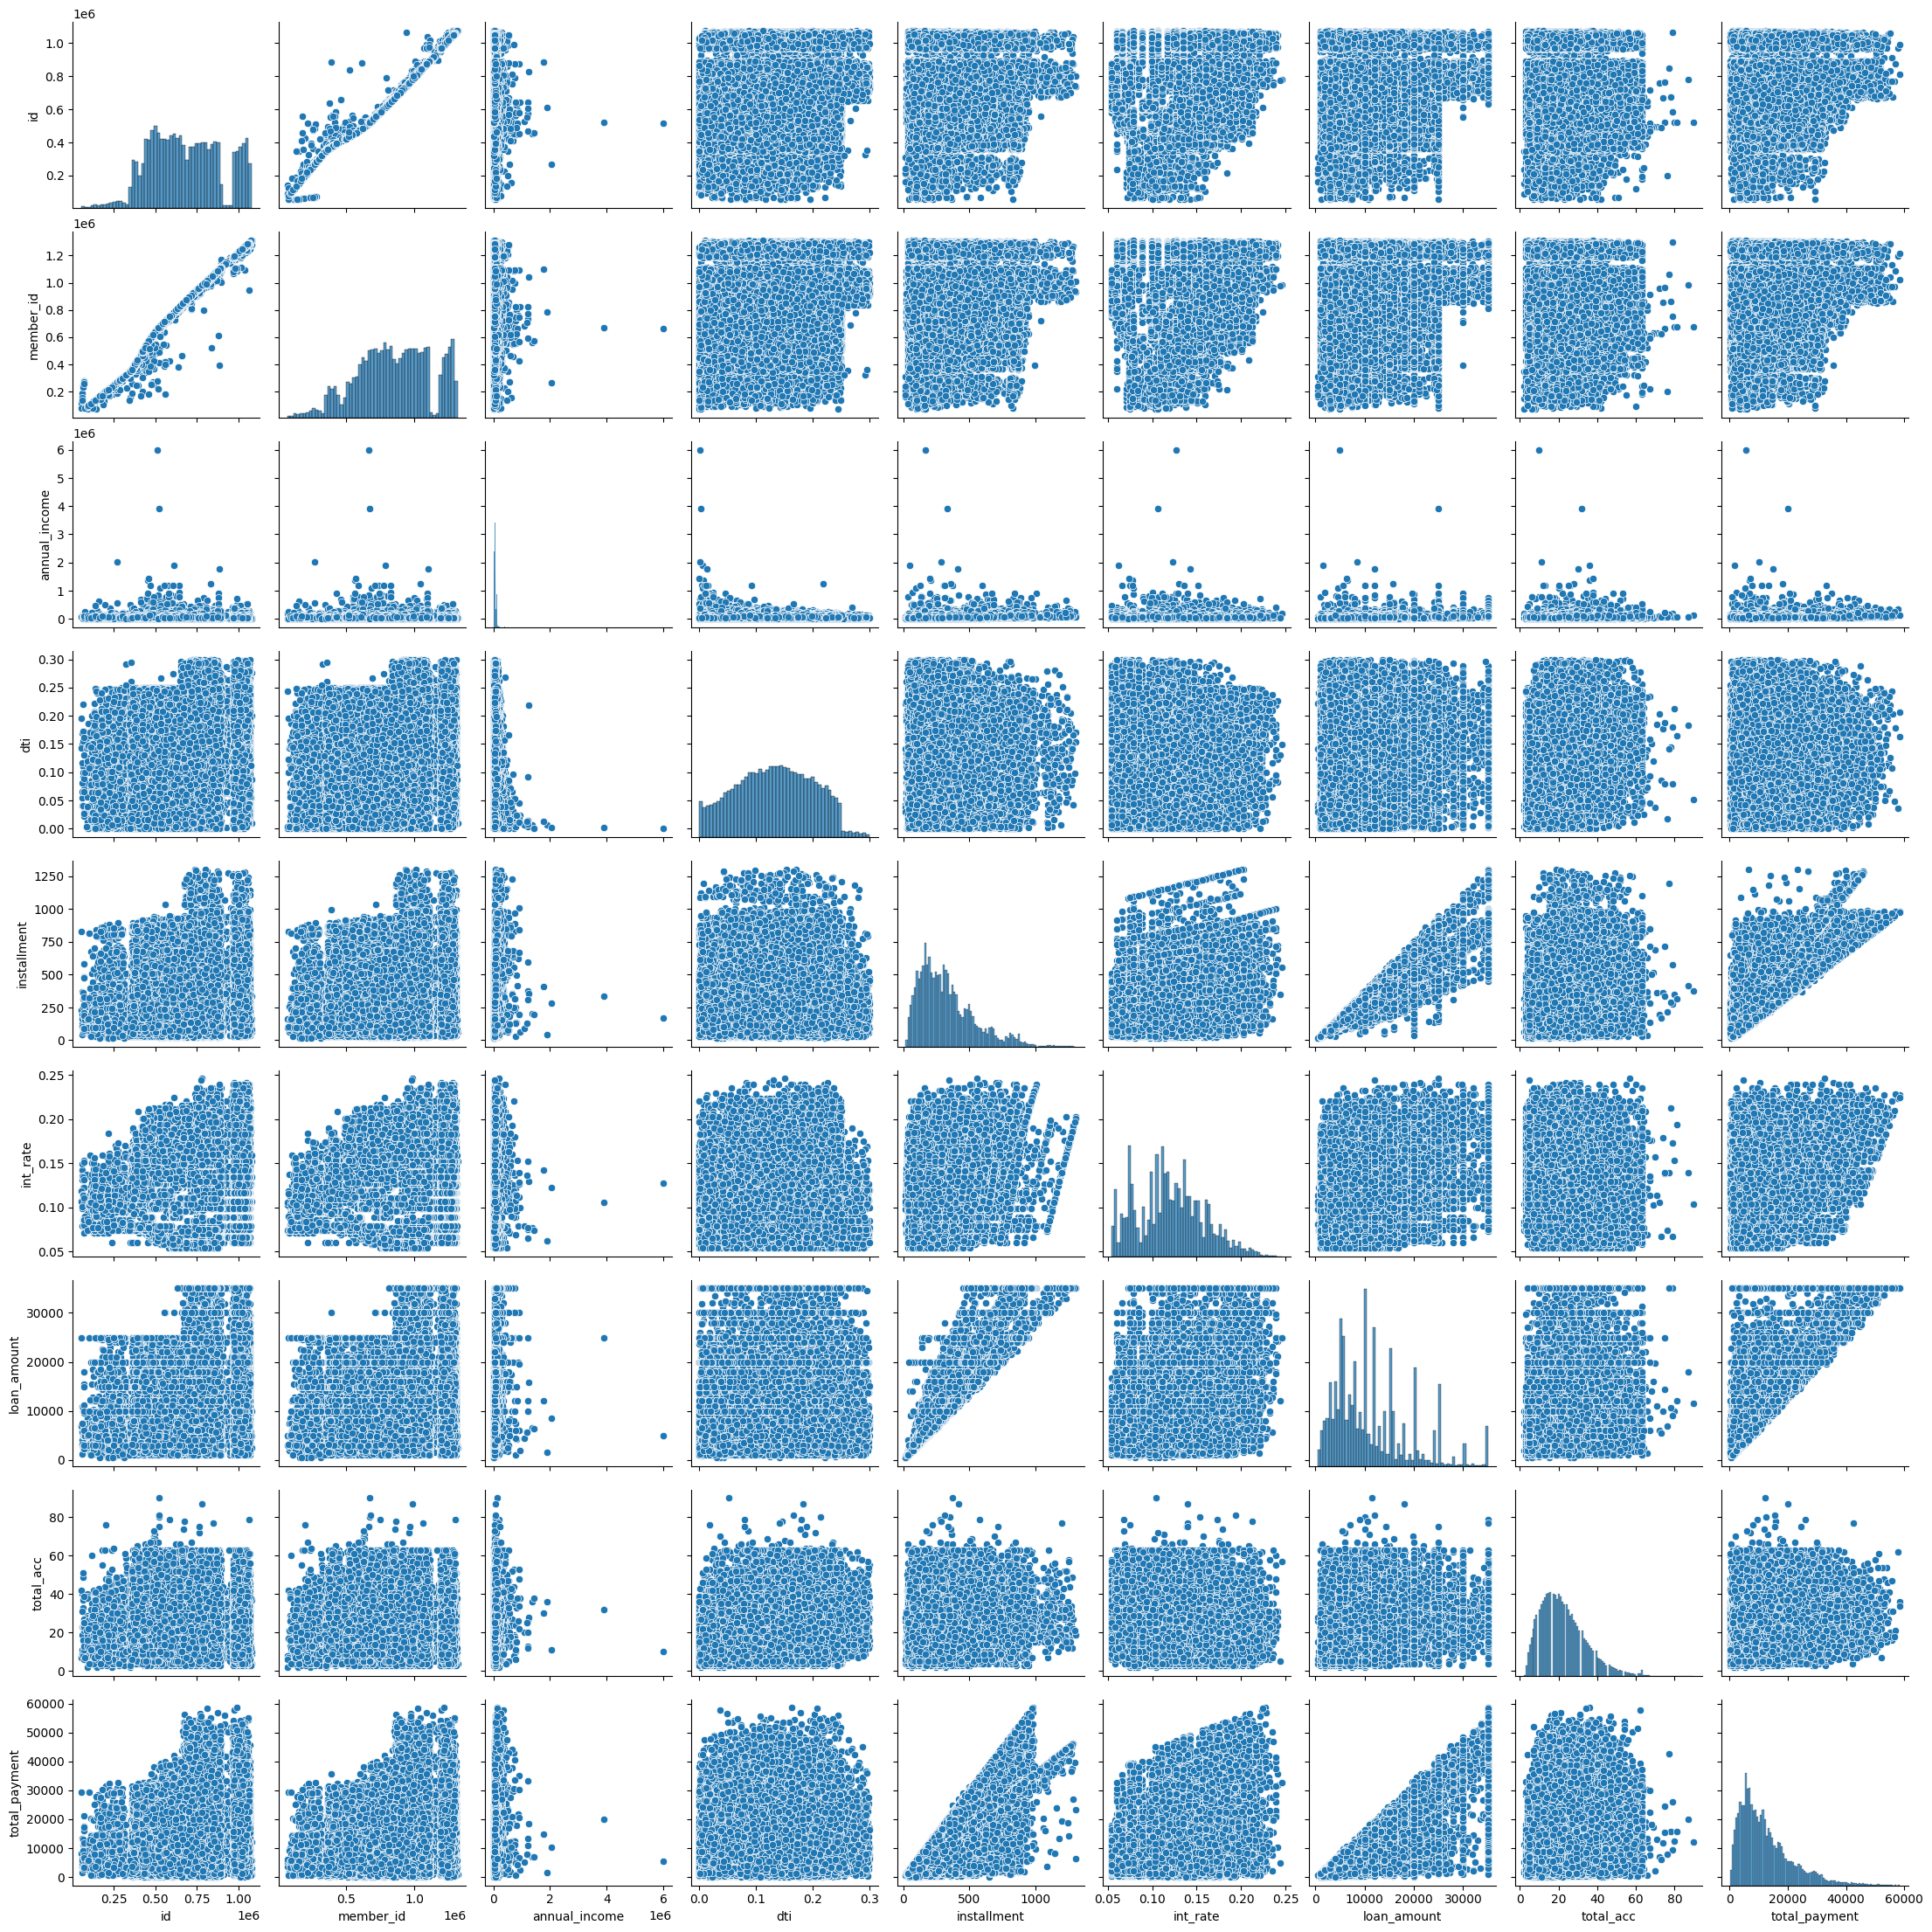

In [8]:
sns.pairplot(data)
plt.show()

- Może można pogrupować nazwy ('emp_title') na rodzaje stanowisk, aby zawężyć ilość kategorii. Podobnie można pomyśleć nad grupowaniem w kolumnie purpose.
- kolumny id, member_id, application_type - do usunięcia
- z kolumn installment, total_payment, loan_amount usunąć installment, kóre jest mocno skorelowane z pozostałymi dwoma
- kodowanie zmiennych nie numerycznych
- wartości none w kolumnie emp_tile stanowią 4%
- w kolumnie home_ovnership 3 obserwacje przyisane do kategorii NONE, która raczej nie jest brakiem danych

## Usuwanie kolumn

In [31]:
data = data.drop(['id', 'member_id', 'application_type'], axis=1)

In [52]:
data.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

## Typy kolumn (przygotowanie do kodowania zmiennych)

Zmienne kategoryczne: (one hot encoding z pominięciem jednej kolumny, zgrupowanie mniej popularnych kategorii do kategorii other, podział tematyczny na bardziej ogólne grupy)
- verification_status
- purpose
- emp_title
- loan_status
- adress_state
- home_ovnership

Zmienne porządkowe: (ordinal encoding + normalizacjia, label encoding)
- emp_length
- grade
- sub_grade

Zmienna binarna: (binary encoding) 
- term

Zmienne reprezentujące daty:
- issue_date
- last_credit_pull_date
- last_payment_date
- next_payment_date

Dla dat możliwość liczenia odległości pomiędzy różnymi datami lub stworzenie zmiennych typu pora roku, kwartał, tydzień roku, dzień tygodnia, czy jest to weekend lub inne możliwie istotne dla tematu.

In [53]:
data.nunique()

id                       38576
address_state               50
application_type             1
emp_length                  11
emp_title                28525
grade                        7
home_ownership               5
issue_date                  65
last_credit_pull_date      107
last_payment_date          102
loan_status                  3
next_payment_date          102
member_id                38576
purpose                     14
sub_grade                   35
term                         2
verification_status          3
annual_income             5096
dti                       2863
installment              15132
int_rate                   371
loan_amount                880
total_acc                   82
total_payment            19525
dtype: int64